# Домашнее задание: модели классификации и оценка их качества.

Будем тренироваться обучать модели классификации и интерпретировать их качество.

Выполнил: Тихонов Сергей, БЭК181

## Часть 1. Обучение моделей классификации (5 баллов). 

Поработайте с датасетом telecom_churn. Вам предстоит по характеристикам клиента предсказать, уйдет он или нет (целевая колонка - Churn).

A. Решите задачу с помощью логистической регрессии:
- подберите значение гиперпараметров с помощью GridSearchCV
Что вы можете сказать об алгоритме? Он переобучился/недообучился/обучился как надо и вы довольны качеством?

B. Решите задачу с помощью метода опорных векторов (с kernel = 'linear'):
- подберите значение гиперпараметров с помощью GridSearchCV
Что вы можете сказать об алгоритме? Он переобучился/недообучился/обучился как надо и вы довольны качеством?

Не забудьте масштабировать данные перед применением линейных моделей.

C. Попробуйте увеличить число признаков с помощью добавления полиномиальных признаков. Также можно добавить функции от признаков вручную (те, которые вам кажутся подходящими в данной задаче).
Улучшилось ли качество алгоритма?

D. Постройте матрицу корреляций признаков. Есть ли признаки, которые практически не коррелируют с целевой переменной? Попробуйте их удалить. Есть ли пары сильно коррелирующих между собой признаков? Удалите по одному признаку из каждой пары.
Помогло ли это улучшить качество в данной задаче?

Пункты C и D можно скомбинировать для достижения наилучшего качества.

E. Сделайте мини-отчет о проведенной работе. Для этого ответьте на вопросы:
a) какой классификатор дал наилучший результат? чему равны значения метрик accuracy, f1-score и ROC-AUC? 
(Вы можете изначально разбить данные на train и test и сравнивать значения метрик на этих выборках; или же можно оценивать качество алгоритмов по кросс-валидации).

b) какие новые признаки вы добавили и какие признаки удалили?

c) удалось ли добиться того, что алгоритм не переобучился и не недообучился?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Загрузка данных:

In [2]:
df = pd.read_csv("telecom_churn.csv")
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [3]:
X = df.iloc[:,:-1]
y = df['Churn'].astype('int64')

In [4]:
# Пропущенных значений нет

X.isnull().any().any()

False

In [5]:
# Рассмотрим типы данных в задаче:

X.dtypes

State                      object
Account length              int64
Area code                   int64
International plan         object
Voice mail plan            object
Number vmail messages       int64
Total day minutes         float64
Total day calls             int64
Total day charge          float64
Total eve minutes         float64
Total eve calls             int64
Total eve charge          float64
Total night minutes       float64
Total night calls           int64
Total night charge        float64
Total intl minutes        float64
Total intl calls            int64
Total intl charge         float64
Customer service calls      int64
dtype: object

In [6]:
# Разделим колонки на числовые и категориальные, чтобы проще было обработать каждые

num_cols = X.columns[(X.dtypes == 'int64') | (X.dtypes == 'float64')].tolist()
cat_cols = X.columns[X.dtypes == 'object']

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)

## Обработка числовых признаков:

In [8]:
# Стандартизируем числовые данные

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

## Обработка категориальных признаков:

In [9]:
# Целых 51 уникальных значений = 51 новый столбец. На самом деле, не так много, поэтому попробую и One_hot, и Target 
# Я сторонник Одного Горячего, поскольку Таргет часто переобучается (см. лекцию) и часто показывает качество хуже

X.State.value_counts().count()

51

In [10]:
from category_encoders.target_encoder import TargetEncoder

tgt_enc = TargetEncoder(smoothing=1)

X_train['State'] = tgt_enc.fit_transform(X_train['State'], y_train)
X_test['State'] = tgt_enc.transform(X_test['State'], y_test);

In [11]:
# Будем использовать pd.get_dummies а не sklearn One_hot, тк просто удобнее и в одну строчку:

X_train = pd.get_dummies(X_train, ['International plan', 'Voice mail plan'], drop_first=True)
X_test = pd.get_dummies(X_test, ['International plan', 'Voice mail plan'], drop_first=True)

## Кросс-валидация и обучение модели:

In [12]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc, f1_score,  make_scorer

f1 = make_scorer(f1_score)

In [13]:
from sklearn.model_selection import GridSearchCV

params = {'C': np.arange(0.1, 7, 0.5)}
lr = LogisticRegression()
svm = SVC(kernel='linear')

cv_lr = GridSearchCV(lr,
                  params,
                  scoring=f1,
                  cv=5
                 )
cv_lr.fit(X_train, y_train)

cv_svm = GridSearchCV(svm,
                  params,
                  scoring=f1,
                  cv=5
                 )
cv_svm.fit(X_train, y_train)

C_best_lr = cv_lr.best_params_['C']
print('Оптимальный С для Logreg:', cv_lr.best_params_['C'])
C_best_svm = cv_svm.best_params_['C']
print('Оптимальный С для SVM:',cv_svm.best_params_['C'])

Оптимальный С для Logreg: 4.1
Оптимальный С для SVM: 0.1


In [14]:
lr_best = LogisticRegression(C=C_best_lr, penalty = 'l2') 
lr_best.fit(X_train, y_train)
y_pred_lr = lr_best.predict(X_test)
print(accuracy_score(y_test, y_pred_lr))

0.8597122302158273


In [15]:
tpr, fpr, _ = roc_curve(y_train, lr_best.predict_proba(X_train)[:, 0])

print('F1-score логистической регрессии:', f1_score(y_test, y_pred_lr))
print('Roc-auc логистической регрессии:', auc(fpr, tpr))

F1-score логистической регрессии: 0.2641509433962264
Roc-auc логистической регрессии: 0.8400069485549579


In [16]:
svm_best = SVC(kernel='linear', C=C_best_svm, probability=True) 
svm_best.fit(X_train, y_train)
y_pred_svm = svm_best.predict(X_test)
print(accuracy_score(y_test, y_pred_svm))

0.8573141486810552


In [17]:
tpr, fpr, _ = roc_curve(y_train, svm_best.predict_proba(X_train)[:, 0])

print('F1-score SVM:', f1_score(y_test, y_pred_svm))
print('Roc-auc SVM:', auc(fpr, tpr))

F1-score SVM: 0.0
Roc-auc SVM: 0.8180894047404585


## Матрица корреляций и полиномиальные признаки

In [18]:
# Возьмем те признаки, которые имеют хоть какую-то линейную зависимость от таргета

df.corr()['Churn'] > 0.07

Account length            False
Area code                 False
Number vmail messages     False
Total day minutes          True
Total day calls           False
Total day charge           True
Total eve minutes          True
Total eve calls           False
Total eve charge           True
Total night minutes       False
Total night calls         False
Total night charge        False
Total intl minutes        False
Total intl calls          False
Total intl charge         False
Customer service calls     True
Churn                      True
Name: Churn, dtype: bool

In [19]:
from sklearn.preprocessing import PolynomialFeatures

X_train, X_test, y_train, y_test = train_test_split(X[['Total day minutes', 'Total day charge','Total eve minutes', 'Total eve charge', 'Customer service calls']], y, random_state=10)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

poly = PolynomialFeatures(3)
X_train = poly.fit_transform(X_train)
X_test = poly.transform(X_test)

In [20]:
params = {'C': np.arange(0.1, 7, 0.5)}
lr = LogisticRegression()
svm = SVC(kernel='linear')

cv_lr = GridSearchCV(lr,
                  params,
                  scoring=f1,
                  cv=5
                 )
cv_lr.fit(X_train, y_train)

cv_svm = GridSearchCV(svm,
                  params,
                  scoring=f1,  
                  cv=5
                 )
cv_svm.fit(X_train, y_train)

C_best_lr = cv_lr.best_params_['C']
print(cv_lr.best_params_)
C_best_svm = cv_svm.best_params_['C']
print(cv_svm.best_params_)

{'C': 3.1}
{'C': 5.1}


In [21]:
lr_best = LogisticRegression(C=C_best_lr, penalty = 'l2') 
lr_best.fit(X_train, y_train)
y_pred_lr = lr_best.predict(X_test)
print(accuracy_score(y_test, y_pred_lr))

0.8908872901678657


In [22]:
tpr, fpr, _ = roc_curve(y_train, lr_best.predict_proba(X_train)[:, 0])

print('F1-score логистической регрессии:', f1_score(y_test, y_pred_lr))
print('Roc-auc логистической регрессии:', auc(fpr, tpr))

F1-score логистической регрессии: 0.46153846153846156
Roc-auc логистической регрессии: 0.8449185474946599


In [23]:
svm_best = SVC(kernel='linear', C=C_best_svm, probability=True) 
svm_best.fit(X_train, y_train)
y_pred_svm = svm_best.predict(X_test)
print(accuracy_score(y_test, y_pred_svm))

0.894484412470024


In [24]:
tpr, fpr, _ = roc_curve(y_train, svm_best.predict_proba(X_train)[:, 0])

print('F1-score SVM:', f1_score(y_test, y_pred_svm))
print('Roc-auc SVM:', auc(fpr, tpr))

F1-score SVM: 0.4634146341463415
Roc-auc SVM: 0.8385155827778779


## Попробуем удалить коррелируемые друг с другом регрессоры

In [25]:
df.corr() > 0.01

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
Account length,True,False,False,False,True,False,False,True,False,False,False,False,False,True,False,False,True
Area code,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False
Number vmail messages,False,False,True,False,False,False,True,False,True,False,False,False,False,True,False,False,False
Total day minutes,False,False,False,True,False,True,False,True,False,False,True,False,False,False,False,False,True
Total day calls,True,False,False,False,True,False,False,False,False,True,False,True,True,False,True,False,True
Total day charge,False,False,False,True,False,True,False,True,False,False,True,False,False,False,False,False,True
Total eve minutes,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False,False,True
Total eve calls,True,False,False,True,False,True,False,True,False,False,False,False,False,True,False,False,False
Total eve charge,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False,False,True
Total night minutes,False,False,False,False,True,False,False,False,False,True,True,True,False,False,False,False,True


По корреляционной матрице сложно определить, какие именно регрессоры коррелируют, но если присмотреться, то можно заметить, что признаки вида **"Total <eve/night/intl> <calls/charges/minutes>"** сильно коррелируют друг с другом. Попробуем отобрать эти и обучить на них модель, при этом добавив полиномы

In [26]:
from sklearn.preprocessing import PolynomialFeatures

X_train, X_test, y_train, y_test = train_test_split(X[['Total day minutes','Total eve minutes', 'Total intl minutes', 'Customer service calls']], y, random_state=10)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

poly = PolynomialFeatures(3)
X_train = poly.fit_transform(X_train)
X_test = poly.transform(X_test)

In [27]:
params = {'C': np.arange(0.1, 7, 0.5)}
lr = LogisticRegression()
svm = SVC(kernel='linear')

cv_lr = GridSearchCV(lr,
                  params,
                  scoring=f1,    
                  cv=5
                 )
cv_lr.fit(X_train, y_train)

cv_svm = GridSearchCV(svm,
                  params,
                  scoring=f1,  
                  cv=5
                 )
cv_svm.fit(X_train, y_train)

C_best_lr = cv_lr.best_params_['C']
print(cv_lr.best_params_)
C_best_svm = cv_svm.best_params_['C']
print(cv_svm.best_params_)

{'C': 2.6}
{'C': 4.6}


In [28]:
lr_best = LogisticRegression(C=C_best_lr, penalty = 'l2') 
lr_best.fit(X_train, y_train)
y_pred_lr = lr_best.predict(X_test)
print(accuracy_score(y_test, y_pred_lr))

0.8920863309352518


In [29]:
tpr, fpr, _ = roc_curve(y_train, lr_best.predict_proba(X_train)[:, 0])

print('F1-score логистической регрессии:', f1_score(y_test, y_pred_lr))
print('Roc-auc логистической регрессии:', auc(fpr, tpr))

F1-score логистической регрессии: 0.4705882352941177
Roc-auc логистической регрессии: 0.8567928558560878


In [30]:
svm_best = SVC(kernel='linear', C=C_best_svm, probability=True) 
svm_best.fit(X_train, y_train)
y_pred_svm = svm_best.predict(X_test)
print(accuracy_score(y_test, y_pred_svm))

0.8920863309352518


In [31]:
tpr, fpr, _ = roc_curve(y_train, svm_best.predict_proba(X_train)[:, 0])

print('F1-score SVM:', f1_score(y_test, y_pred_svm))
print('Roc-auc SVM:', auc(fpr, tpr))

F1-score SVM: 0.4642857142857143
Roc-auc SVM: 0.8471343644645752


**Итог**: качество логистической регрессии немного, но обогнало предыдущие варианты моделей.

### Выводы:

В данной задаче присутствует проблема дисбаланса классов.

**A, B**: алгоритмы обучились плохо, качество обоих алгоритмов сопостовимое и отличается только в зависимости от изначального разбиения данных. При этом нельзя сказать, что алгоритмы показали высокий результат, несмотря на то, что доля правильных ответов составляет 85-86%, поскольку константный алгоритм вида:
$$
a(x) = 0
$$
Выдаёт долю правильных ответов 85.5%, что совсем немного ниже, чем логистическая регрессия и метод опорных векторов. Если же посмотреть на более релевантную для данной задачи метрику, а именно F1-score, то можно заметить, что логистическая регрессия плохо отличает положительный и отрицательный класс (F1-score = 0.17), тогда как метод опорных векторов совсем не отличает и при линейном ядре выдаёт константный прогноз (F1-score = 0). Таким образом, можно говорить о недообучении алгоритмов.

**C, D**: доля правильных ответов алгоритма выросло на 4-5%, что неплохо для данной задачи с дисбалансом классов, поскольку эта разница позволяет отличать наши модели от приведённой выше константной модели. При этом значительно (в 2 раза) вырос F1-score (для логистической регрессии F1-score = 0.461, для метода опорных векторов F1-score = 0.463), то есть метрики precision, recall, что означает, что наша модель учитывает дисбаланс классов, обозначенный в пунктах **А, В**.

Что касается модификации, были выбраны признаки, корреляция с таргетом у которых хотя бы 0.07. При этом были добавлены полиномы 3-й степени. Эмпирическим путём было найдено, что взятие полиномов выше чем 3-й степени не повышает качество, а ниже 3-й степени - снижает его.

Если же провести отбор признаков и убрать коррелирующие друг с другом, можно получить более высокий F1-score (F1-score = 0.47 для логистической регрессии), то есть в задаче есть простор для дополнительных исследований

**E**: Опишем результаты лучшей модели:

a) Логистическая регрессия при отборе признаков

Значения метрик 

**accuracy** = 0.892

**F1-score** = 0.470

**ROC-AUC** = 0.856

b) Удалил большинство коррелируемых между собой признаков и оставил те признаки, которые более всего коррелируют с таргетом:

**[Total day minutes, Total eve minutes, Total intl minutes, Customer service calls]**

c) Удалось преодолеть недообучение алгоритма, которое было обнаружено в пунктах **A, B**. При этом удалось избежать переобучения алгоритма, т.к. было достигнуто высокое качество на тестовой выборке. 

## Часть 2. Оценка качества моделей классификации (5 баллов).

* Колонки 0, 1, ..., 13 - анонимизированные характеристики клиентов (некоторые числовые, некоторые категориальные). 
* Target - целевая переменная: 1 - выдать кредит, 0 - не выдать кредит.

На этих данных было обучено три различных алгоритма классификации и получены предсказания:
* pred1_probs - предсказанные вероятности положительного класса, полученные алгоритмом 1.
* pred1_classes - предсказанные алгоритмом 1 классы
* pred2_probs, pred2_classes, pred3_probs, pred3_classes - аналогичные величины для алгоритмов 2 и 3

Наша задача - оценить качество каждого из трех алгоритмов и разобраться, какой из алгоритмов лучше всего работает в данной задаче.

In [32]:
df = pd.read_csv("credit_scoring_example1.csv")
df.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,target,pred1_probs,pred1_classes,pred2_probs,pred2_classes,pred3_probs,pred3_classes
0,1,22.08,11.46,2,4,4,1.585,0,0,0,...,2,100,1213,0,0.506772,1,0.610853,1,0.375494,0
1,0,22.67,7.00,2,8,4,0.165,0,0,0,...,2,160,1,0,0.358519,0,0.185941,0,0.200975,0
2,0,29.58,1.75,1,4,4,1.250,0,0,0,...,2,280,1,0,0.358753,0,0.523009,1,0.160465,0
3,0,21.67,11.50,1,5,3,0.000,1,1,11,...,2,0,1,1,0.408729,0,0.185941,0,0.357771,0
4,1,20.17,8.17,2,6,4,1.960,1,1,14,...,2,60,159,1,0.480904,0,0.526646,1,0.260169,0


In [33]:
df.shape

(689, 21)

**Задание 1.** Проверьте target на сбалансированность по классам, сделайте вывод.

In [34]:
# Выведем распределение по target для проверки на сбалансированность

df.target.value_counts() / df.shape[0]

0    0.554427
1    0.445573
Name: target, dtype: float64

**Промежуточный вывод:** Как видно, распределение почти равное, то есть доля класса 1 практически равна доле класса 0, поэтому можем говорить о сбалансированности по классам.

**Задание 2.** Вычислите accuracy - долю правильных ответов каждого из алгоритмов. Какой алгоритм имеет наибольшую accuracy?

In [38]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print('Доля правильных ответов 1-го алгоритма:', accuracy_score(df.target, df.pred1_classes))
print('Доля правильных ответов 2-го алгоритма:', accuracy_score(df.target, df.pred2_classes))
print('Доля правильных ответов 3-го алгоритма:', accuracy_score(df.target, df.pred3_classes))

Доля правильных ответов 1-го алгоритма: 0.6618287373004355
Доля правильных ответов 2-го алгоритма: 0.6719883889695211
Доля правильных ответов 3-го алгоритма: 0.6400580551523948


**Промежуточный вывод:** Второй алгоритм имеет наивысшую долю правильных ответов.

**Задание 3.** Теперь вычислите точность и полноту каждого из алгоритмов.

In [39]:
def pr_recall_calculation(y_true, y_pred, number):
    
    print(f'Precision для модели {number} составляет {precision_score(y_true, y_pred)}')
    print(f'Recall для модели {number} составляет {recall_score(y_true, y_pred)}\n')

In [40]:
pr_recall_calculation(df.target, df.pred1_classes, 1)
pr_recall_calculation(df.target, df.pred2_classes, 2)
pr_recall_calculation(df.target, df.pred3_classes, 3)

Precision для модели 1 составляет 0.6907216494845361
Recall для модели 1 составляет 0.4364820846905538

Precision для модели 2 составляет 0.6103542234332425
Recall для модели 2 составляет 0.7296416938110749

Precision для модели 3 составляет 0.6903225806451613
Recall для модели 3 составляет 0.3485342019543974



Самым полезным инструментом в практических задачах является ***матрица ошибок***. Смотря на неё и регулируя порог, определяющий классы, мы можем достичь оптимального решения нашей задачи.

**Задание 4.** Используя функцию plot_confusion_matrix для визуализации матрицы ошибок, нарисуйте матрицы ошибок всех трех алгоритмов.

In [41]:
import itertools
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
 
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
 
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
 
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

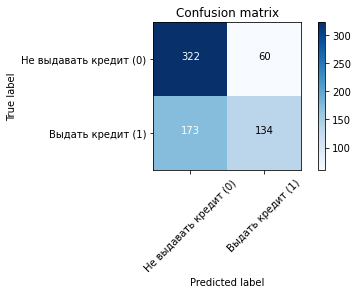

In [42]:
plot_confusion_matrix(confusion_matrix(df.target, df.pred1_classes), ['Не выдавать кредит (0)', 'Выдать кредит (1)'])

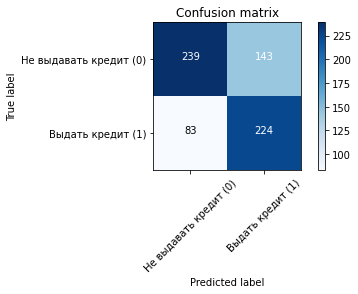

In [43]:
plot_confusion_matrix(confusion_matrix(df.target, df.pred2_classes), ['Не выдавать кредит (0)', 'Выдать кредит (1)'])

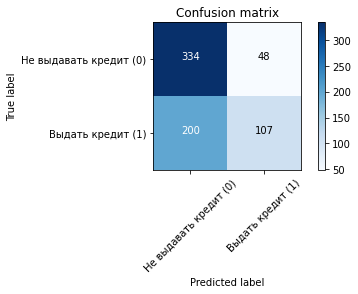

In [44]:
plot_confusion_matrix(confusion_matrix(df.target, df.pred3_classes), ['Не выдавать кредит (0)', 'Выдать кредит (1)'])

Давайте определимся с целями нашего предсказания:
    
* **Вариант 1**: хотим выдать кредит максимальному числу людей среди тех, кто мог бы его вернуть. При этом не хотим много ошибаться (общее число ошибок не более 35%).
  
1) Мы не хотим, чтобы алгоритм много ошибался: accuracy $\geq$ 0.65.

2) Кроме того полнота должна быть как можно больше (число в левом нижнем квадрате матрицы ошибок минимально).

**Задание 5.** Для каждого алгоритма найдите такой порог принятия решения, чтобы выполнялись перечисленные выше условия. Какой максимальной полноты можно добиться у каждой из моделей при условии, что accuracy $\geq$ 0.65?

**Комментарий:** порог можно искать в цикле с небольшим шагом.

In [45]:
def Variant_1(y_true, pred_probs):
    
    recall = []
    rapids = []
    
    for t in np.arange(0, 1, 0.01):
        
        y_pred = np.zeros(y_true.shape[0])
        y_pred[pred_probs >= t] = 1
 
        if accuracy_score(y_true, y_pred) >= 0.64: 
            
            rapids.append(t)
            recall.append(recall_score(y_true, y_pred))
    
    return np.max(recall), rapids[np.argmax(recall)] 

In [46]:
algorithm_11 = Variant_1(df.target, df.pred1_probs)
print(f'Наибольшая полнота алгоритма 1, которой можно добиться при условии accuracy > 0.65 - {algorithm_11[0]} при пороге {algorithm_11[1]}')

Наибольшая полнота алгоритма 1, которой можно добиться при условии accuracy > 0.65 - 0.8208469055374593 при пороге 0.34


In [47]:
algorithm_12 = Variant_1(df.target, df.pred2_probs)
print(f'Наибольшая полнота алгоритма 2, которой можно добиться при условии accuracy > 0.65 - {algorithm_12[0]} при пороге {algorithm_12[1]}')

Наибольшая полнота алгоритма 2, которой можно добиться при условии accuracy > 0.65 - 0.8371335504885994 при пороге 0.27


In [48]:
algorithm_13 = Variant_1(df.target, df.pred3_probs)
print(f'Наибольшая полнота алгоритма 3, которой можно добиться при условии accuracy > 0.65 - {algorithm_13[0]} при пороге {algorithm_13[1]}')

Наибольшая полнота алгоритма 3, которой можно добиться при условии accuracy > 0.65 - 0.6416938110749185 при пороге 0.23


**Задание 6.** Визуализируйте матрицу ошибок для каждого из трех алгоритмов с подобранным порогом.

In [49]:
def Variant_1_visualize(y_true, pred_probs, t):
    
    y_pred = np.zeros(y_true.shape[0])
    y_pred[pred_probs > t] = 1
    
    plot_confusion_matrix(confusion_matrix(y_true, y_pred), ['Не выдавать кредит (0)', 'Выдать кредит (1)'])

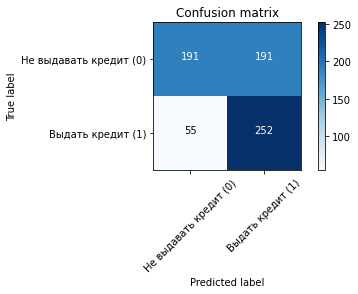

In [50]:
# 1 алгоритм
Variant_1_visualize(df.target, df.pred1_probs, algorithm_11[1])

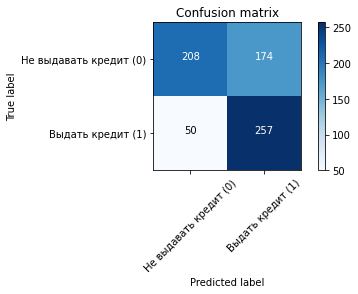

In [51]:
# 2 алгоритм
Variant_1_visualize(df.target, df.pred2_probs, algorithm_12[1])

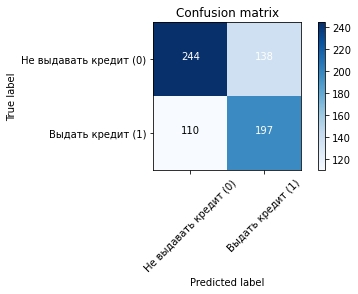

In [52]:
# 3 алгоритм
Variant_1_visualize(df.target, df.pred3_probs, algorithm_13[1])

**Выводы:** с поставленной задачей лучше всего справилась вторая модель.

Наша цель может звучать и по-другому:
    
* **Вариант 2**: среди тех, кому модель выдает кредит, должно быть меньше всего ошибок (мало людей, кто его на самом деле не вернет - на них будем терять деньги). 
    При этом не хотим много ошибаться (общее число ошибок не более 35%).
  
1) Мы не хотим, чтобы алгоритм много ошибался: accuracy $\geq$ 0.65.

2) Кроме того точность должна быть как можно больше (число в правом верхнем квадрате матрицы ошибок минимально).

**Задание 7.** Для каждого алгоритма найдите порог принятия решения, чтобы выполнялись перечисленные выше условия. Какой максимальной точности можно добиться у каждой из моделей при условии, что accuracy $\geq$ 0.65? 

In [53]:
def Variant_2(y_true, pred_probs):
    
    precision = []
    rapids = []
    
    for t in np.arange(0, 1, 0.01):
        
        y_pred = np.zeros(y_true.shape[0])
        y_pred[pred_probs >= t] = 1
        
        if accuracy_score(y_true, y_pred) >= 0.64: 
            
            rapids.append(t)
            precision.append(precision_score(y_true, y_pred))
    
    return np.max(precision), rapids[np.argmax(precision)]   

In [54]:
algorithm_21 = Variant_2(df.target, df.pred1_probs)
print(f'Наибольшая точность алгоритма 1, которой можно добиться при условии accuracy > 0.65 - {algorithm_21[0]} при пороге {algorithm_21[1]}')

Наибольшая точность алгоритма 1, которой можно добиться при условии accuracy > 0.65 - 0.7480916030534351 при пороге 0.5700000000000001


In [55]:
algorithm_22 = Variant_2(df.target, df.pred2_probs)
print(f'Наибольшая точность алгоритма 2, которой можно добиться при условии accuracy > 0.65 - {algorithm_22[0]} при пороге {algorithm_22[1]}')

Наибольшая точность алгоритма 2, которой можно добиться при условии accuracy > 0.65 - 0.8367346938775511 при пороге 0.73


In [56]:
algorithm_23 = Variant_2(df.target, df.pred3_probs)
print(f'Наибольшая точность алгоритма 3, которой можно добиться при условии accuracy > 0.65 - {algorithm_23[0]} при пороге {algorithm_23[1]}')

Наибольшая точность алгоритма 3, которой можно добиться при условии accuracy > 0.65 - 0.7142857142857143 при пороге 0.56


**Задание 8.** Нарисуйте матрицы ошибок для каждого из алгоритмов с найденными значениями порога. Какая модель лучше всех справилась с этой задачей?

In [57]:
def Variant_2_visualize(y_true, pred_probs, t):
    
    y_pred = np.zeros(y_true.shape[0])
    y_pred[pred_probs > t] = 1
    
    plot_confusion_matrix(confusion_matrix(y_true, y_pred), ['Не выдавать кредит (0)', 'Выдать кредит (1)'])

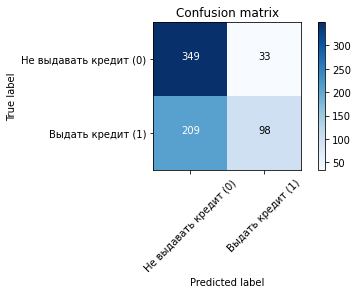

In [58]:
# 1 алгоритм
Variant_2_visualize(df.target, df.pred1_probs, algorithm_21[1])

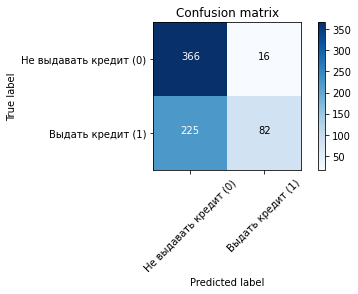

In [59]:
# 2 алгоритм
Variant_2_visualize(df.target, df.pred2_probs, algorithm_22[1])

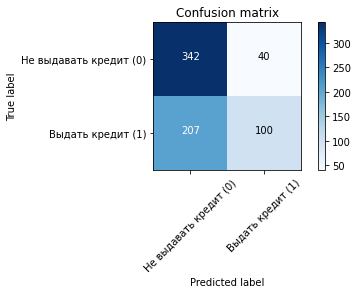

In [60]:
# 3 алгоритм
Variant_2_visualize(df.target, df.pred3_probs, algorithm_23[1])

**Выводы:** с поставленной задачей лучше всего справилась вторая модель.

Также (**Вариант 3**) можно потребовать, чтобы и точность, и полнота были высокими, то есть обе ошибки в матрице ошибок были маленькие. Как вариант - можно максимизировать F1-score (среднее гармоническое между точностью и полнотой).

**Задание 9.** Найдите пороги для достижения максимального F1-score для каждой из трех моделей и нарисуйте матрицы ошибок. Какая модель решает поставленную задачу лучше остальных?

In [61]:
def Variant_3(y_true, pred_probs):
    
    f1 = []
    rapids = []
    
    for t in np.arange(0, 1, 0.01):
        
        y_pred = np.zeros(y_true.shape[0])
        y_pred[pred_probs >= t] = 1
        
        if accuracy_score(y_true, y_pred) >= 0.64: 
            
            rapids.append(t)
            f1.append(f1_score(y_true, y_pred))
    
    return np.max(f1), rapids[np.argmax(f1)]   

In [62]:
algorithm_31 = Variant_3(df.target, df.pred1_probs)
print(f'Наибольший f1-score алгоритма 1, которой можно добиться при условии accuracy > 0.65 - {algorithm_31[0]} при пороге {algorithm_31[1]}')

Наибольший f1-score алгоритма 1, которой можно добиться при условии accuracy > 0.65 - 0.672 при пороге 0.34


In [63]:
algorithm_32 = Variant_3(df.target, df.pred2_probs)
print(f'Наибольший f1-score алгоритма 2, которой можно добиться при условии accuracy > 0.65 - {algorithm_32[0]} при пороге {algorithm_32[1]}')

Наибольший f1-score алгоритма 2, которой можно добиться при условии accuracy > 0.65 - 0.6990291262135923 при пороге 0.32


In [64]:
algorithm_33 = Variant_3(df.target, df.pred3_probs)
print(f'Наибольший f1-score алгоритма 3, которой можно добиться при условии accuracy > 0.65 - {algorithm_33[0]} при пороге {algorithm_33[1]}')

Наибольший f1-score алгоритма 3, которой можно добиться при условии accuracy > 0.65 - 0.6137071651090343 при пороге 0.23


**Выводы:** с поставленной задачей лучше всего справилась вторая модель.

#### Кстати

В python есть удобная функция classification_report, которая выводит значения нескольких метрик.

In [65]:
from sklearn.metrics import classification_report

print(classification_report(df['target'],df['pred1_classes']))

              precision    recall  f1-score   support

           0       0.65      0.84      0.73       382
           1       0.69      0.44      0.53       307

    accuracy                           0.66       689
   macro avg       0.67      0.64      0.63       689
weighted avg       0.67      0.66      0.65       689



### Обучим свою модель для предсказания target.

**Задание 10.** Отнормируйте признаки в задаче и обучите логистическую регрессию предсказывать target.

In [66]:
# Разделим выборку на X и y
X = df.iloc[:,:14]
y = df.target

# Отнормируем признаки
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Обучим логистическую регрессию 
lr = LogisticRegression()
lr.fit(X_scaled, y)
accuracy_score(y, lr.predict(X_scaled))

0.8780841799709724

**Промежуточный вывод:** По доле правильных ответов видно, что наш алгоритм логистической регрессии показал результат значительно выше, чем результаты алгоритмов, предложенные в приведённом выше датасете.

**Задание 11.** Подберите порог для перевода предсказания в классы, чтобы максимизировать:
    а) точность 
    б) полноту 
    в) f1-score. 
Лучше ли логистическая регрессия справилась с задачей, чем три готовые модели, предсказания которых мы анализировали выше?

In [67]:
# Вернём вероятности положительного класса:

y_predicted_proba = lr.predict_proba(X_scaled)[:,1]

In [68]:
def statistics_logreg(y_true, pred_probs):
    
    recall = []
    precision = []
    f1 = []
    rapids = []
    
    for t in np.arange(0, 1.01, 0.01): #1.01 чтобы 1 включалось и было последним возможным порогом
        
        y_pred = np.zeros(y_true.shape[0])
        y_pred[pred_probs >= t] = 1
        rapids.append(t)
        recall.append(recall_score(y_true, y_pred))
        precision.append(precision_score(y_true, y_pred))
        f1.append(f1_score(y_true, y_pred))
    
    rec = (np.max(recall), rapids[np.argmax(recall)]) 
    pr = (np.max(precision), rapids[np.argmax(precision)])   
    f_1 = (np.max(f1), rapids[np.argmax(f1)])   
    
    print(f'Наибольшая полнота логистической регрессии, которой можно добиться - {rec[0]} при пороге {rec[1]}')
    print(f'Наибольшая точность логистической регрессии, которой можно добиться - {pr[0]} при пороге {pr[1]}')
    print(f'Наибольший f1-score логистической регрессии, которой можно добиться - {f_1[0]} при пороге {f_1[1]}')

In [69]:
statistics_logreg(df.target, y_predicted_proba)

Наибольшая полнота логистической регрессии, которой можно добиться - 1.0 при пороге 0.0
Наибольшая точность логистической регрессии, которой можно добиться - 1.0 при пороге 0.99
Наибольший f1-score логистической регрессии, которой можно добиться - 0.8685897435897436 при пороге 0.52


**Вывод**: По accuracy (доле правильных ответов) и f1-score (среднее гармоническое между precision и recall) получили, что логистическая регрессия значительно превосходит эти алгоритмы. А именно логистическая регрессия имеет долю правильных ответов 0.878 против 0.662, 0.672 и 0.640 у первого, второго и третьего алгоритма соответственно; а также f1-score 0.869 против 0.672, 0.699, 0.613 у трёх предложенных в датасете алгоритмов.

Что касается метрик precision и recall, то их разрешено брать при любом accuracy (нет ограничения 0.65 как в случае с готовыми алгоритмами), поэтому получили, по сути, теоретическое значение, что полнота максимальна при пороге 0 (все объекты относим к положительному классу), а точность при пороге 1.